In [3]:
import pandas as pd
import os
import spotipy
from spotipy.oauth2 import SpotifyOAuth
# import cred
client_ID='4e1c1626b9e04c0fba6d8f14d31ab3e6'
client_SECRET='61dd39d3b27b40fa8753c2bb7932e88c'   
redirect_url='http://127.0.0.1:9090'
scope = "playlist-modify-public"
username = 'rt47etgc6xpwhhhb8575rth83'


sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_ID, client_secret= client_SECRET, redirect_uri=redirect_url, scope=scope))

# sp.user_playlist_create(user=username, name='backintime', public=True)

list_of_songs     = []
list_of_songs_uri = []


# splits a list into lists of 100
def split_with_no(list, No):
    lists = []
    no = 0
    listy = []
    for i in list:
        if no < 100:
            no += 1
            listy.append(i)
        else:
            lists.append(listy) 
            listy = []
            no = 0
    lists.append(listy)
    # print('len - ',len(lists))
    return lists


# gets the song uri
def song(name, artist):
    result = sp.search(q=name+" "+artist)
    try:
        return result['tracks']['items'][0]['uri']
    except:
        'some kind of error'

# adds songs to a playlist
def add_to_playlist(playlist_id, list_of_tracks):
    splity_split = split_with_no(list_of_tracks, 100)
    for hundred_lis in splity_split:
        sp.user_playlist_add_tracks(user=username, playlist_id=playlist_id, tracks=hundred_lis)

# creates a spotify playlist according to the name
def create_playlist(name):
    sp.user_playlist_create(user=username, name=name, public=True)

# gets the playlist id
def get_playlist_id(name):
    playlists = sp.user_playlists(user=username)
    for playlist in playlists['items']:
        if playlist['name'] == name:
            return playlist['id']

def get_song_details(song_uri):
    song_details = sp.track(track_id=song_uri)
    return song_details

# get the songs detials in bulk
def get_songs_details(song_uris):
    # get all the song detials and add them to a dictionary
    the_song_details = []
    for song_uri in song_uris:
        song_details = sp.track(song_uri.split(':')[2])
        the_song_details.append({ 'name': song_details['name'], 'artist': song_details['artists'][0]['name'], 'album': song_details['album']['name'], 'year': song_details['album']['release_date'].split('-')[0], 'duration': song_details['duration_ms'], 'popularity': song_details['popularity'] })
    return the_song_details

# get artist details
def get_artist_details(song_details):
    artist_details = sp.artist(artist_id=song_details['artists'][0]['id'])
    return artist_details

# get recentlly played songs
def get_recently_played():
    recently_played = sp.current_user_recently_played(limit=50)
    return recently_played

# get song genre
# def get_artist_genre(artist_details):
#     return artist_details['genres']


# song details to dictonary
def song_details_to_dict(song_details):
    dic = { 'name': song_details['name'], 
            'artist': song_details['artists'][0]['name'], 
            'album': song_details['album']['name'], 
            'year': song_details['album']['release_date'].split('-')[0], 
            'duration': song_details['duration_ms'], 
            'popularity': song_details['popularity'],
            'preview_url': song_details['preview_url'],
            'artist_id': song_details['id'],
            'song_uri': song_details['uri'],
            }
    # add artist details id
    return dic


# gets the top listened songs by year and returns a dataframe with the song name, artist, year, times listened and the timestamp of the last time it was listened
def make_playlist_for_x_times_listened(times): # warning: this will generate lots of playlists
    listened_x_times = top_listened_by_year[top_listened_by_year.times_listened >= times].sort_values('ts').iloc[::-1]
    #reverse the listening order
    listened_x_times = listened_x_times
    for year in listened_x_times.year.unique():
        # print(listened_x_times[listened_x_times.year == year].spotify_track_uri)
        # print(listened_x_times[listened_x_times.year == year].spotify_track_uri.values)
        # print(listened_x_times[listened_x_times.year == year].spotify_track_uri.values.tolist())
        create_playlist(name=f'{year} - {times} times listened')
        playlist_id = get_playlist_id(name=f'{year} - {times} times listened')
        add_to_playlist(playlist_id=playlist_id, list_of_tracks=listened_x_times[listened_x_times.year == year].spotify_track_uri.values.tolist())

# create playlists of most played songs each year with miniumum 5 times listened
def playlist_of_most_played_songs(times=5):
    # moves played songs sorted my most to least each year 
    for year in top_listened_by_year.year.unique():
        create_playlist(name=f'{year} - {times} Most listened songs')
        playlist_id = get_playlist_id(name=f'{year} - {times} Most listened songs')
        

    #     playlist_id = get_playlist_id(name=f'{year} - {times} times listened')
    #     add_to_playlist(playlist_id=playlist_id, list_of_tracks=top_listened_by_year[top_listened_by_year.year == year].spotify_track_uri.values.tolist())


def get_unique_songs_details():
    import jsongs:
        # json file location form the folder_loc
        try:
            song_details = get_song_details(song_uri)
        except:
            continue
        # add [ to the start of the file
        if not os.path.exists(json_loc):
            with open(json_loc, 'w') as f:
                f.write('[\n    ')
        # add song details to a json file
        with open(json_loc, 'a') as f:
            f.write(json.dumps(song_details))
            f.write(',\n    ')  # add a space between each song
        
        # remove the last comma and add a ] to the end of the file
    with open(json_loc, 'rb+') as f:
        f.seek(-3, os.SEEK_END)
        f.truncate()
    with open(json_loc, 'a') as f:
        f.write('\n]')




# create a df from the StreamingHistory.json files
#check if I am using windows or linux
os_name = os.name
if os.name == 'nt':
    # Windows
    folder_loc = r"C:\Users\saket\Downloads\Compressed\spotify data\MyData"
else:
    # Linux
    folder_loc = "/media/saket/OS/Users/saket/Downloads/Compressed/spotify data/MyData"
                #   /media/saket/OS/Users/saket/Downloads/Compressed
files_loc = []
dfs = []
files = os.listdir(folder_loc)
for file in files:  
    if "endsong_" in file:
        print(file)
        # append file for windows
        if os.name == 'nt':
            files_loc.append(folder_loc+'\\'+file)
        else:
            files_loc.append(folder_loc+'/'+file)
for i in range(len(files_loc)):
    dfs.append(pd.read_json(files_loc[i]))
df = pd.concat(dfs)
# df = pd.read_json(files_loc[0])


# sort by date
df = df.sort_values("ts")

# add a column for year
df['year'] = df.ts.apply(lambda row: row.split('-')[0])

# add a column for times listened to a track
track_count = df.spotify_track_uri.value_counts()
df['times_listened'] = df.spotify_track_uri.apply(lambda track: track_count[track] if track else None)

# dataframe that contains unique spotify_track_uri all the dublicates are removed
# top_listened_by_year = df.drop_duplicates(subset='spotify_track_uri')


uniuqe_songs = df.spotify_track_uri.unique()




endsong_0.json
endsong_1.json
endsong_2.json
endsong_3.json
endsong_4.json
endsong_5.json
endsong_6.json


Defaulting to user installation because normal site-packages is not writeable


In [4]:
# if windows
if os.name == 'nt':
    folder_loc+'\\most_played_each_year_details.csv'
else:
    folder_loc+'/most_played_each_year_details.csv'

In [ ]:

# most played songs each year details to a file, location is the folder where the StreamingHistory.json files are
with open(folder_loc+'\\most_played_each_year_details.json', 'w') as fp:
    json.dump(most_played_each_year_details, fp)


In [10]:

recents = get_recently_played()
print(recents)

{'items': [{'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6FXMGgJwohJLUSr5nVlf9X'}, 'href': 'https://api.spotify.com/v1/artists/6FXMGgJwohJLUSr5nVlf9X', 'id': '6FXMGgJwohJLUSr5nVlf9X', 'name': 'Massive Attack', 'type': 'artist', 'uri': 'spotify:artist:6FXMGgJwohJLUSr5nVlf9X'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD

In [91]:
# get all the details about the df
def get_details(df):
    # print('shape - ',df.shape)
    # print('columns - ',df.columns)
    # print('dtypes - ',df.dtypes)
    # print('nulls - ',df.isnull().sum())
    # print('unique - ',df.nunique())
    # print('head - ',df.head())
    # print('tail - ',df.tail())
    # print('describe - ',df.describe())
    print('info - ',df.info())

# get_details(df)

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

# get song genre
# def get_song_genre(song_uri):
#     song_details = sp.track(track_id=song_uri)
#     artist_details = sp.artist(artist_id=song_details['artists'][0]['id'])
#     return artist_details['genres']

# get song details


In [88]:
# top 10 songs each year
top_listened_by_year = df.groupby(['year','spotify_track_uri']).agg({'ts':'count'}).rename(columns={'ts':'times_listened'}).sort_values('times_listened', ascending=False).reset_index().groupby('year').head(10)

#get song cover art
def get_song_cover_art(song_uri):
    song_details = sp.track(track_id=song_uri)
    return song_details['album']['images'][0]['url']

# display song cover art
# def display_song_cover_art(get_song_cover_art):
#     from IPython.display import Image
#     from IPython.core.display import HTML 
#     return Image(url = get_song_cover_art)


song_uri = "spotify:track:5GgD8DZFgkmTuyShnYAub7"

# get song cover art
song_art = get_song_cover_art(song_uri)



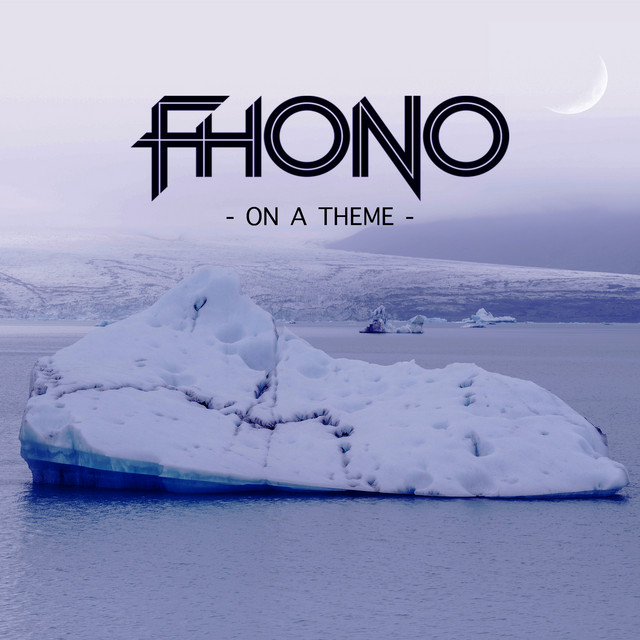

In [95]:
# import requests
# # display song art with matplotlib
# def display_song_cover_art(song_art):
#     import matplotlib.pyplot as plt
#     import matplotlib.image as mpimg
#     img=mpimg.imread(song_art)
#     imgplot = plt.imshow(img)
#     plt.show()

# # display song art with IPython
# def display_song_cover_art(song_art):
#     from IPython.display import Image
#     from IPython.core.display import HTML 
#     return Image(url = song_art)

# # convert to song art to base64
# def convert_song_art_to_base64(song_art):
#     import base64
#     from IPython.display import HTML
#     return HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(requests.get(song_art).content).decode()))

# # display song art with base64
# def display_song_cover_art(song_art):
#     import base64
#     from IPython.display import HTML
#     return HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(requests.get(song_art).content).decode()))

# song_uri = "spotify:track:5GgD8DZFgkmTuyShnYAub7"
# song_art = get_song_cover_art(song_uri)


In [47]:

# # most_played_each_year_details to a dataframe, except the array with not same length
# def to_df(most_played_each_year_details):
#     most_played_each_year_details_df = pd.DataFrame(most_played_each_year_details).T
#     most_played_each_year_details_df = most_played_each_year_details_df.dropna()
#     return most_played_each_year_details_df

# for i in most_played_each_year_details:
#     print(len(i))

# # most_played_each_year_details to a csv file, location is the folder where the StreamingHistory.json files are
# def to_csv(most_played_each_year_details_df):
#     most_played_each_year_details_df.to_csv(folder_loc+'\\most_played_each_year_details.csv')

# most_played_each_year_details_df = to_df(most_played_each_year_details)

# to_csv(most_played_each_year_details_df)
################# get songs details will take more than 10 min to run The code #####################


In [57]:
#sorted by date if listed listened 10 times


# playlists of lists of songs by different years most listened to least listened to 5 times
make_playlist_for_x_times_listened(5)




In [62]:
### WARKING: THIS WILL CREATE A LOT OF PLAYLISTS
# make_playlist_for_x_times_listened(2)
# make_playlist_for_x_times_listened(5)
# make_playlist_for_x_times_listened(10)
# make_playlist_for_x_times_listened(20)
make_playlist_for_x_times_listened(1)


In [ ]:
## get the info about the dataframe
## some useful commands
# print(df.info())
# print(df.head(2))
# print(df.tail())
# print(df.columns)
# print(df.dtypes)
# print(df.describe())
# print(df.shape)
# print(df.isnull().sum())

# df.sort_values(by=['column1'], ascending=[True])
# print(df.isnull().sum())

In [9]:


# print(top_listened_by_year)
top_listened_by_year.info()
# df['times_listened'] = [ track_count[i] for i in df.spotify_track_uri]
# sort by most listened to songs
# df['times_listened'] = [i for i in df.spotify_track_uri]
# df.spotify_track_uri.value_counts()
# df['times_listened'][0]
# df.spotify_episode_uri.value_counts()[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 3744 to 9166
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 14026 non-null  object 
 1   username                           14026 non-null  object 
 2   platform                           14026 non-null  object 
 3   ms_played                          14026 non-null  int64  
 4   conn_country                       14026 non-null  object 
 5   ip_addr_decrypted                  14026 non-null  object 
 6   user_agent_decrypted               13768 non-null  object 
 7   master_metadata_track_name         14025 non-null  object 
 8   master_metadata_album_artist_name  14025 non-null  object 
 9   master_metadata_album_album_name   14025 non-null  object 
 10  spotify_track_uri                  14025 non-null  object 
 11  episode_name                       1 non-null      o

In [3]:
for i in df.spotify_track_uri:
    pass

NameError: name 'df' is not defined

In [156]:
len(df['times_listened'])

105868

In [ ]:

df.ms_played.sum()


12130584484

In [135]:
track_count = df.spotify_track_uri.value_counts()
# for i in df.spotify_track_uri:
#     try:
#         # print(track_count[i])
#         track_count[i]
#         pass
#     except:
#         print(i)


In [103]:
# sort date_listened by 

df.spotify_track_uri.value_counts()['spotify:track:5GgD8DZFgkmTuyShnYAub7']

368

spotify:track:59s0s39NFWScuHDbHytI14


                         ts                   username  \
3744   2019-08-31T04:10:16Z  rt47etgc6xpwhhhb8575rth83   
11584  2019-08-31T04:12:25Z  rt47etgc6xpwhhhb8575rth83   

                                         platform  ms_played conn_country  \
3744   Android-tablet OS 6.0 API 23 (Intex,     )     120295           IN   
11584  Android-tablet OS 6.0 API 23 (Intex,     )     102991           IN   

      ip_addr_decrypted user_agent_decrypted  \
3744     223.187.145.76              unknown   
11584    223.187.145.76              unknown   

                  master_metadata_track_name  \
3744                                Indeciso   
11584  Loco Contigo (feat. J. Balvin & Tyga)   

      master_metadata_album_artist_name master_metadata_album_album_name  ...  \
3744                               Reik                         Indeciso  ...   
11584                          DJ Snake                    Carte Blanche  ...   

      episode_name episode_show_name spotify_episode_uri re

In [70]:
# sort by most listened to songs

df.spotify_track_uri.value_counts()

spotify:track:5GgD8DZFgkmTuyShnYAub7    368
spotify:track:5ZKG94fnjiuMH5yrC5S9lS    321
spotify:track:1qDrWA6lyx8cLECdZE7TV7    320
spotify:track:7jLlBsf7n6P0qyVTzXLkpu    294
spotify:track:4s0hDz7zGgZUav9EvzyLsB    266
                                       ... 
spotify:track:7t7VTdIZS01AfR2w2SHb17      1
spotify:track:5N7s7nhywtONPI5FJhabAP      1
spotify:track:4KLiNPRah1bWQyisb2NtoS      1
spotify:track:4CbrNGvwVjneG8Nk9YQqMR      1
spotify:track:5iRMeciMNFqshlfkrKzOR5      1
Name: spotify_track_uri, Length: 14025, dtype: int64

spotify:track:5GgD8DZFgkmTuyShnYAub7    368
spotify:track:5ZKG94fnjiuMH5yrC5S9lS    321
spotify:track:1qDrWA6lyx8cLECdZE7TV7    320
spotify:track:7jLlBsf7n6P0qyVTzXLkpu    294
spotify:track:4s0hDz7zGgZUav9EvzyLsB    266
                                       ... 
spotify:track:7t7VTdIZS01AfR2w2SHb17      1
spotify:track:5N7s7nhywtONPI5FJhabAP      1
spotify:track:4KLiNPRah1bWQyisb2NtoS      1
spotify:track:4CbrNGvwVjneG8Nk9YQqMR      1
spotify:track:5iRMeciMNFqshlfkrKzOR5      1
Name: spotify_track_uri, Length: 14025, dtype: int64

In [ ]:

df.ms_played.sum()


12130584484

In [61]:

df.ms_played.sum()


12130584484